In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
from numpy.random import default_rng


In [4]:
rng = default_rng(42)

## Dropping keys and checking randomly

[@UpandAtom - drunken man](https://youtube.com/shorts/8REMx4J9ue8?si=_rWzpVWmWPu-F_U2) has a short video that details a counterintuitive probability problem. 

Consider a person that goes to open their door with a key, but can't remember which one opens the door. They select one of the $N$ keys on the keyring and then try to open the door. On this first try, the chance that they open the door is 1/N. 

If they drop their keys and randomly select another key, what is the probablity that they pick the right key in this scenario? Naively, I would say the chance is _still_ $1/N$. This naive prediction _does not_ take into account the information we know that the keys have been dropped once already. Factoring in this information to my prediction, it changes the probability that the correct key will be selected, its actually

$P(key~is~correct) = \frac{1}{N}\cdot\frac{1-N}{N}$

The probability that they select the correct key on the second try is probablity that they select the key correctly on this second try multiplied by the probability that they selected the key _incorrectly_ on the first try. 

This seems wrong, how can the probabilty change in this seemingly random selection of keys?

Let's try a Monte Carlo experiment with $\times 2$ keys, 

We'll build 1000 virtual people that all try to get into their houses. Each person is given 2 keys, we'll label them `0` and `1`. If they select key `0`, they get in. If they select key `1`, they drop the keys and select a new one.


_Note: because these are virtual people we can be a little mean and leave the keys indistinguishable, so its always a random choice of `0` or `1`._

According to our theory above, 

|number of tries|number of people|percent success|
|---|---|---|
|1| 500 | 50\%|
|2| 250 | 25\%|
|3| 125| 12.5\%|
|4| 62.5|0.0625\%|

Our random group of 1000 virtual people locked out of the apartment will have 500 people that guess correctly on the first try and only 62-63 people that guess correctly on the 4th try. 

(array([  0., 491., 244., 127.,  66.,  40.,  15.,   8.,   4.,   4.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

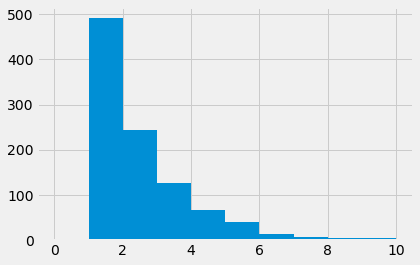

In [7]:
N = 1000
cases = np.zeros(N)
keys = np.arange(2)
for ncase in range(N):
    tries = 0
    key = 10
    while key != 0:
        key = rng.integers(len(keys), size = 1)
        tries += 1
    cases[ncase] = tries
plt.hist(cases, bins = np.arange(np.max(cases)))

In [8]:
try_01 = np.sum(cases == 1)/N
try_02 = np.sum(cases == 2)/N
try_03 = np.sum(cases == 3)/N
try_04 = np.sum(cases == 4)/N

print('success on try 1: {}, {:1.2f}%'.format(try_01*N, 100*try_01))

print('success on try 2: {}, {:1.2f}%'.format(try_02*N, 100*try_02))

print('success on try 3: {}, {:1.2f}%'.format(try_03*N, 100*try_03))

print('success on try 4: {}, {:1.2f}%'.format(try_04*N, 100*try_04))


success on try 1: 491.0, 49.10%
success on try 2: 244.0, 24.40%
success on try 3: 127.0, 12.70%
success on try 4: 66.0, 6.60%


Using a Monte Carlo approach, we built a discrete version of the dropping keys scenario. The results from Monte Carlo support the approach of using the probabilites of guessing correctly **and** the probabilities of previous _incorrect_ guesses to find that $\approx60~out~of~1000$ people will guess correctly on their 4th try. 